 1  ANN CLASSIFICATION 


100%|██████████| 26.4M/26.4M [02:11<00:00, 201kB/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 95.5kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:21<00:00, 205kB/s] 


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Epoch 1/10, Loss: 2.2990, Accuracy: 14.39%
Epoch 2/10, Loss: 1.7471, Accuracy: 27.86%
Epoch 3/10, Loss: 0.9706, Accuracy: 61.21%
Epoch 4/10, Loss: 0.7764, Accuracy: 70.58%
Epoch 5/10, Loss: 0.6812, Accuracy: 75.11%
Epoch 6/10, Loss: 0.6185, Accuracy: 77.92%
Epoch 7/10, Loss: 0.5679, Accuracy: 79.90%
Epoch 8/10, Loss: 0.5327, Accuracy: 81.20%
Epoch 9/10, Loss: 0.5040, Accuracy: 82.18%
Epoch 10/10, Loss: 0.4809, Accuracy: 82.94%

Classification Test Results:
Accuracy: 81.81%
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.98      0.94      0.96      1000
           2       0.79      0.61      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.67      0.80      0.73      1000
           5       0.93      0.88      0.91      1000
           6       0.54      0.53      0.53      1000


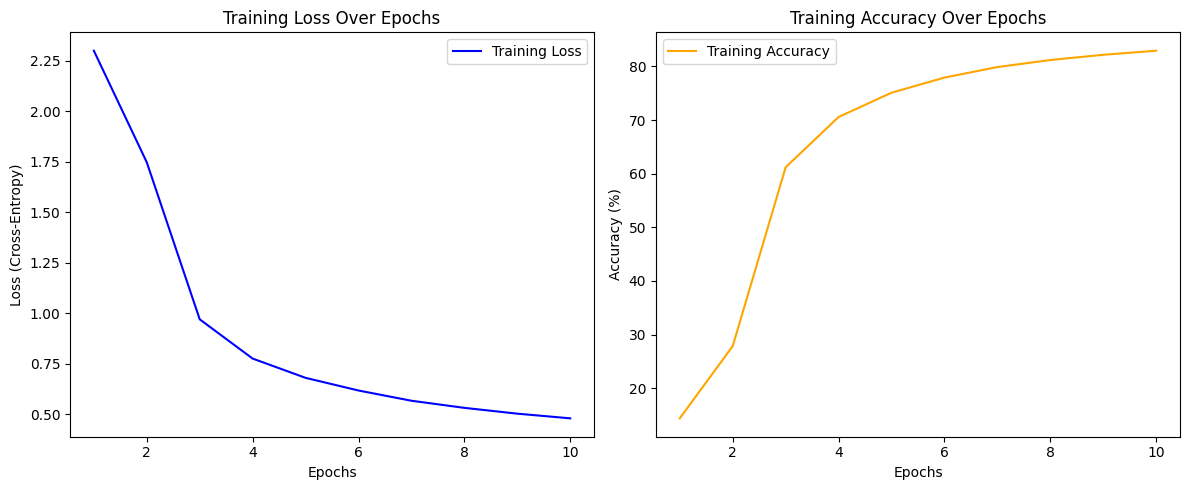

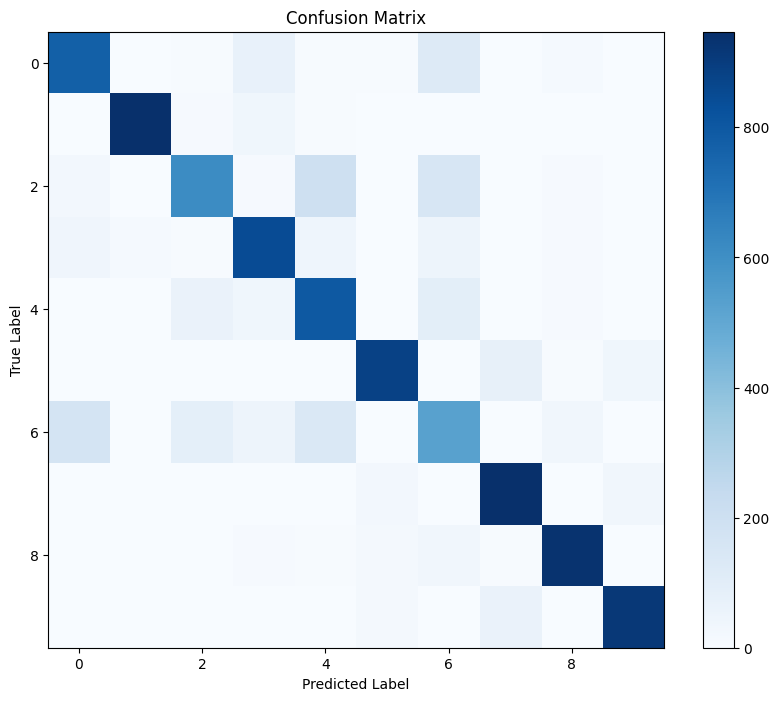

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load and preprocess the FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Classification Network
class ClassificationNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ClassificationNetwork, self).__init__()
        
        # Define parameters
        self.weights1 = nn.Parameter(torch.randn(input_size, hidden_size1) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_size1))
        self.weights2 = nn.Parameter(torch.randn(hidden_size1, hidden_size2) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(hidden_size2))
        self.weights3 = nn.Parameter(torch.randn(hidden_size2, output_size) * 0.01)
        self.bias3 = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        # Flatten the input
        x = x.flatten(start_dim=1)
        x = F.relu(torch.matmul(x, self.weights1) + self.bias1)
        # Layer 2
        x = F.relu(torch.matmul(x, self.weights2) + self.bias2)
        # Output layer
        x = torch.matmul(x, self.weights3) + self.bias3
        return x

# Initialize network parameters
input_size = 28 * 28
hidden_size1 = 64
hidden_size2 = 32
output_size = 10
learning_rate = 0.01
epochs = 10

# Initialize the network, optimizer, and loss function
model = ClassificationNetwork(input_size, hidden_size1, hidden_size2, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_cal = nn.CrossEntropyLoss()

# Training loop
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        pred = model(images)
        loss = loss_cal(pred, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        total_loss += loss.item()
        predicted = torch.argmax(pred, dim=1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    # Calculate loss and accuracy for the epoch
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total * 100)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}, Accuracy: {correct / total * 100:.2f}%")

# Evaluate on the test set
correct = 0
total = 0
predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = outputs.argmax(dim=1)
        predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

accuracy = correct / total * 100

# Print the classification report
print(f"\nClassification Test Results:")
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(all_labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title("Training Loss Over Epochs")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


2  ANN REGRESSION

Epoch 0/1000, Train Loss: 5.6298604011535645, Val Loss: 5.528667449951172
Epoch 10/1000, Train Loss: 5.570722579956055, Val Loss: 5.46714973449707
Epoch 20/1000, Train Loss: 5.457365989685059, Val Loss: 5.3466010093688965
Epoch 30/1000, Train Loss: 5.213642120361328, Val Loss: 5.089376926422119
Epoch 40/1000, Train Loss: 4.731715679168701, Val Loss: 4.588912487030029
Epoch 50/1000, Train Loss: 3.910051107406616, Val Loss: 3.7526631355285645
Epoch 60/1000, Train Loss: 2.778719902038574, Val Loss: 2.6315712928771973
Epoch 70/1000, Train Loss: 1.661244511604309, Val Loss: 1.5662075281143188
Epoch 80/1000, Train Loss: 1.017791986465454, Val Loss: 0.985295295715332
Epoch 90/1000, Train Loss: 0.8494516015052795, Val Loss: 0.850037693977356
Epoch 100/1000, Train Loss: 0.7932196259498596, Val Loss: 0.7996412515640259
Epoch 110/1000, Train Loss: 0.7514121532440186, Val Loss: 0.7580459117889404
Epoch 120/1000, Train Loss: 0.7182849645614624, Val Loss: 0.7245219945907593
Epoch 130/1000, Train Los

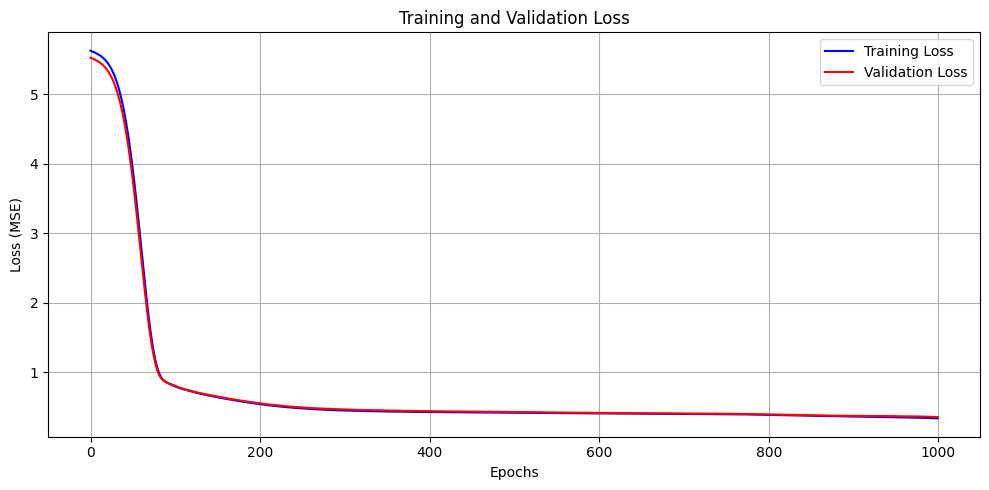

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Model
class Ann_Regression(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Ann_Regression, self).__init__()
        
        # Define parameters
        self.weights1 = nn.Parameter(torch.randn(input_size, hidden_size1) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_size1))
        self.weights2 = nn.Parameter(torch.randn(hidden_size1, hidden_size2) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(hidden_size2))
        self.weights3 = nn.Parameter(torch.randn(hidden_size2, output_size) * 0.01)
        self.bias3 = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        # Layer 1
        x = F.relu(torch.matmul(x, self.weights1) + self.bias1)
        # Layer 2
        x = F.relu(torch.matmul(x, self.weights2) + self.bias2)
        # Output layer
        x = torch.matmul(x, self.weights3) + self.bias3
        return x

# Initialize network parameters
input_size = 8
hidden_size1 = 64
hidden_size2 = 32
output_size = 1
learning_rate = 0.001
epochs = 1000

# Initialize the network
net = Ann_Regression(input_size, hidden_size1, hidden_size2, output_size)

# Define optimizer and loss function
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_cal = nn.MSELoss()

# Training loop
regression_train_loss = []
regression_val_loss = []

for epoch in range(epochs):
    # Training mode
    net.train()
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Forward pass
    predictions = net(X_train_tensor)
    
    # Calculate loss
    loss = loss_cal(predictions, y_train_tensor)
    
    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    
    # Validation phase
    net.eval()
    with torch.no_grad():
        val_predictions = net(X_test_tensor)
        val_loss = loss_cal(val_predictions, y_test_tensor)
    
    # Store losses
    regression_train_loss.append(loss.item())
    regression_val_loss.append(val_loss.item())
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, "
              f"Train Loss: {loss.item()}, "
              f"Val Loss: {val_loss.item()}")

# Evaluation
net.eval()
with torch.no_grad():
    test_predictions = net(X_test_tensor).cpu().numpy()
    mse = mean_squared_error(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    
print(f"\nRegression Test Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Plotting
plt.figure(figsize=(10, 5))

# Plot training and validation loss
plt.plot(regression_train_loss, label="Training Loss", color="blue")
plt.plot(regression_val_loss, label="Validation Loss", color="red")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


3  CNN CLASSIFICATION


CNN Setup:
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7242 - loss: 0.7800 - val_accuracy: 0.8622 - val_loss: 0.3909
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8661 - loss: 0.3698 - val_accuracy: 0.8795 - val_loss: 0.3358
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8858 - loss: 0.3164 - val_accuracy: 0.8918 - val_loss: 0.3075
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9000 - loss: 0.2745 - val_accuracy: 0.8967 - val_loss: 0.2889
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9111 - loss: 0.2481 - val_accuracy: 0.8989 - val_loss: 0.2792
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9165 - loss: 0.2332 - val_accuracy: 0.9037 - val_loss: 0.2674
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9259 - loss: 0.2056 - val_accuracy: 0.9017 - val_loss: 0.2636
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9289 - loss: 0.1930 - 

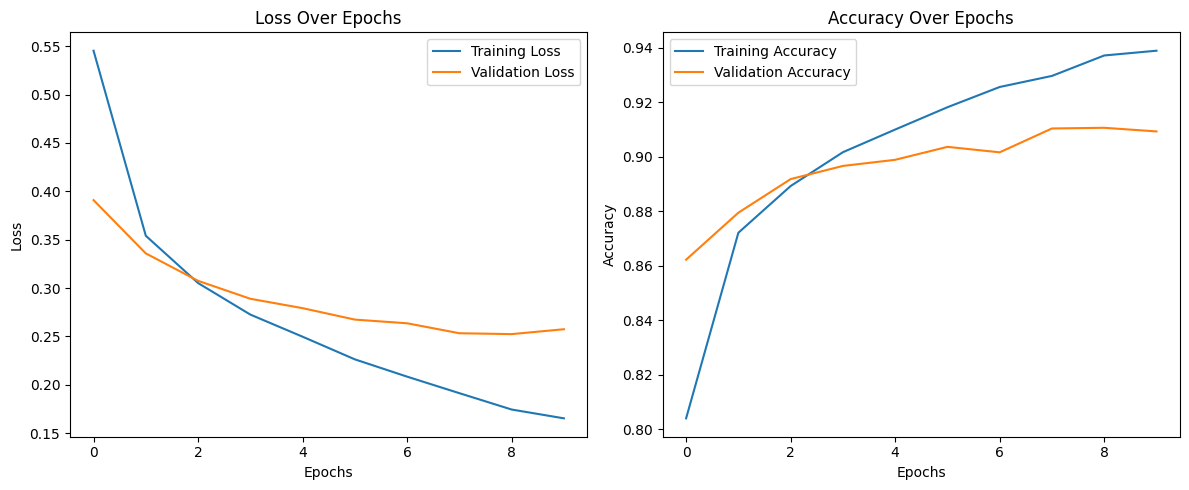

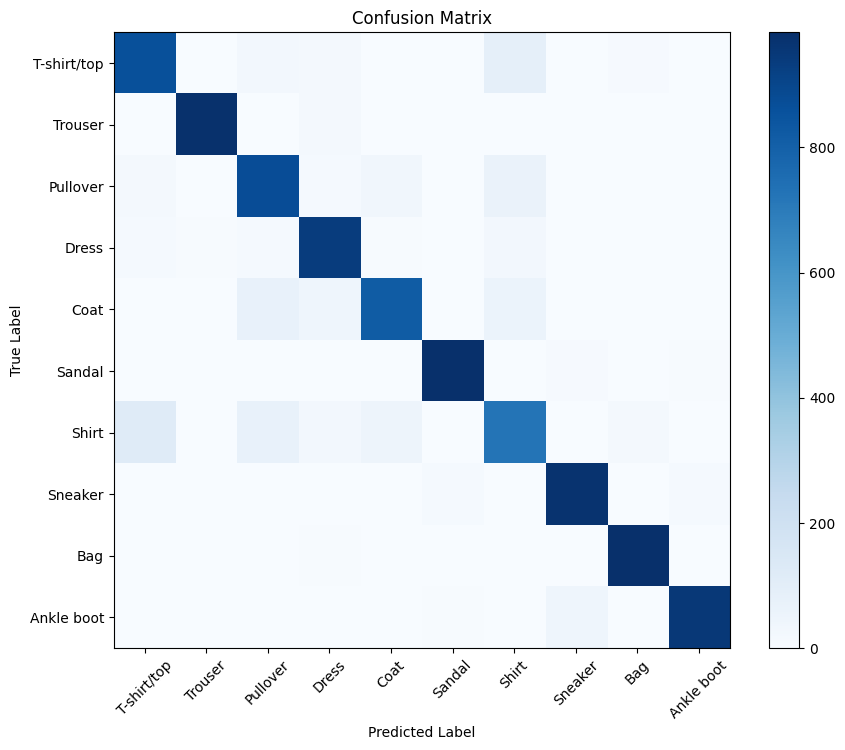

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train = x_train/ 255.0
x_test = x_test/ 255.0

y_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("CNN Setup:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Define the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax')
])

# Summary of the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
acc = model.evaluate(x_test, y_test)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, target_names=y_classes)



print(f"\nClassification Test Results:")
print(f"Accuracy: {acc[1] * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

# Plot Loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(10), labels=y_classes, rotation=45)
plt.yticks(ticks=np.arange(10), labels=y_classes)
plt.show()